## Newton's Method

Problem 1

In [6]:
import numpy as np

In [7]:
def newton_meth(f, x_0, fprime, tol=1e-5, maxiter=15):
    i = 0
    dist = 100
    x_k = x_0
    while dist > tol and i < maxiter:
        x_kp1 = x_k - f(x_k) / fprime(x_k)
        dist = abs(x_kp1 - x_k)
        x_k = x_kp1
        i += 1
    return x_k, f(x_k)

In [8]:
g = lambda x: np.e ** x - 2
gprime = lambda x: np.e ** x

h = lambda x: x ** 4 - 3
hprime = lambda x: 4 * x ** 3

newton_meth(g, 3, gprime)

(0.6931471805599454, 0.0)

In [10]:
newton_meth(h, 3, hprime)

(1.3160740129525732, 7.362999099314038e-13)

In [11]:
# Problem 2

In [14]:
def investing(N_1, N_2, P_1, P_2):
    r_0 = 0.1
    f = lambda r: P_2 * (1 - (1 + r) ** (-N_2)) - P_1* ((1 + r) ** N_1 - 1)
    fprime = lambda r: P_2 * N_2 * (1 + r) ** (-N_2 - 1) - N_1 * P_1 * (1 + r) ** (N_1 - 1)
    
    return newton_meth(f, r_0, fprime)

In [15]:
investing(30, 20, 2000, 8000)

(0.03877843223027751, -2.184195636800723e-05)

In [16]:
# Problem 3

In [49]:
def newton_meth_backtrack(f, x_0, fprime, tol=1e-5, maxiter=15, alpha=1):
    i = 0
    dist = 100
    x_k = x_0
    while dist > tol and i < maxiter:
        x_kp1 = x_k - alpha * f(x_k) / fprime(x_k)
        dist = abs(x_kp1 - x_k)
        x_k = x_kp1
        i += 1
    if i == maxiter:
        #print("Didn't converge")
        pass
    return x_k, f(x_k), i

In [50]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: 1./3 * np.power(np.abs(x), -2/3)
newton_meth_backtrack(f, 0.01, f_prime)

(-327.6800000000003, -6.8941910081020294, 15)

In [51]:
newton_meth_backtrack(f, 0.01, f_prime, alpha=0.4)

(6.400000000000134e-07, 0.008617738760127598, 6)

In [52]:
# Problem 4

In [54]:
from matplotlib import pyplot as plt

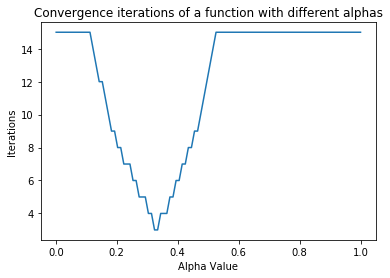

The alpha that gives the least amount of iterations  0.3238767676767677


In [71]:
n = 100
alphas = np.linspace(0.001, .9999, n)
data = np.empty((n, 3))
f_xs = np.empty(n)
iters = np.empty(n)
for i, alpha_now in enumerate(alphas):
    data[i, :] = newton_meth_backtrack(f, 0.01, f_prime, alpha=alpha_now)
np.min(data[:, 2])
plt.plot(alphas, data[:,2])
plt.title("Convergence iterations of a function with different alphas")
plt.xlabel("Alpha Value")
plt.ylabel("Iterations")
plt.show()
smallest_alpha = alphas[np.argwhere(data[:, 2] == np.min(data[:, 2]))][0][0]
print("The alpha that gives the least amount of iterations ", smallest_alpha)

In [72]:
# Problem 5

In [75]:
from scipy import linalg as la

In [86]:
def newtons_meth_vec(f, x_0, Df, tol=1e-5, maxiter=15, alpha=1):
    i = 0
    dist = 1000    
    x_k = x_0

    if np.isscalar(x_0):
        while dist > tol and i < maxiter:
            x_kp1 = x_k - alpha * f(x_k) / Df(x_k)
            dist = abs(x_kp1 - x_k)
            x_k = x_kp1
            i += 1
    else:
        while dist > tol and i < maxiter:
            y = la.solve(Df(x_k), f(x_k))
            x_kp1 = x_k - alpha* y
            dist = la.norm(x_kp1 - x_k, np.inf)
            x_k = x_kp1
            i += 1
            
    if i == maxiter:
        print("Didn't converge")
        
    return x_k, f(x_k), i

In [87]:
f = lambda x: np.array([x[0]**2, x[0]**3 - x[1]])
f_prime = lambda x: np.array([[2 * x[0] , 0], [3 * x[0]**2, -1]])

newtons_meth_vec(f, np.full(2, 1.5), f_prime, maxiter=100)

(array([ 5.72204590e-06, -7.49400542e-16]),
 array([3.27418093e-11, 9.36750677e-16]),
 18)

In [85]:
# Problem 6
 # Thanks to reiko for help on this. 

In [94]:
gamma = 5
delta = 1
alpha_1 = 1
alpha_2 = 0.55

def bioremediation(gamma, delta, alpha_1, alpha_2):
    
    def function_bio(vec):
        x, y = vec
        return np.array([gamma * x * y - x * (1 + y), -x * y + (delta - y) * (1 + y)])
    def der_func(vec):
        x, y = vec
        return np.array([[gamma * y - (1 + y), gamma * x - x], [-y, -x + (delta - y - (1 + y))]])
    
    x_grid = np.linspace(-0.25, 0, 100)
    y_grid = np.linspace(0, 0.25, 100)
    
    output1 = np.array([3.75, 0.25])
    output2 = np.array([0, 1])
    
    for x in x_grid:
        for y in y_grid:
            x_start = np.array([x, y])
            print(newtons_meth_vec(f, x_start, der_func, 1e-6, 50, alpha_1)[:-1])
            x_vec_1,  converged_1 = newtons_meth_vec(f, x_start, der_func, 1e-6, 50, alpha_1)[:-1]
            x_vec_2,  converged_2 = newtons_meth_vec(f, x_start, der_func, 1e-6, 50, alpha_2)[:-1]
    return np.array([x, y])

In [95]:
bioremediation(gamma, delta, alpha_1, alpha_2)

/Users/cacheellsworth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.


ValueError: array must not contain infs or NaNs